# Diffraction Problems

This notebook contains the problems which are solved with the Diffraction Tool

## Import all the things

Import regular packages

In [1]:
%matplotlib inline

import numpy as np
from cmath import pi
import matplotlib.pyplot as plt


Add relative path

In [2]:
import sys
sys.path.append("../scripts")

Import Diffraction Tool

In [3]:
from DiffractionTool import RaySomSolver
from DiffractionTool import PatternGenerator
from DiffractionTool import AnSpectSolver

## Helper functions

### Display 2d wave internsity 

In [4]:
def intensity(U):
    return  np.real(U*np.conj(U))

In [5]:
def displace_2d(I,xylabels,interval,figureSize=(4,3),**kwargs):
    fig, axes = plt.subplots(1,1,figsize=figureSize)
    X=np.linspace(interval[0][0],interval[0][1],I.shape[1])
    Y=np.linspace(interval[1][0],interval[1][1],I.shape[0])
    axes.contourf(X,Y,I)
    if 'xylim' in kwargs:
        xylim=kwargs['xylim']
        axes.set_xlim(xylim[0])
        axes.set_ylim(xylim[1])
    axes.set_xlabel(xylabels[0])
    axes.set_ylabel(xylabels[1])

## Problems

### Problem 1

Calculate the diffraction of a hole with a diameter of $10\mu m$ illuminated by the parallel light from $z=0.1\mu m$ to $z=100\mu m$.

<img src="https://github.com/yesunhuang/Optics_Toolbox_In_Python/blob/17c395048a995b15e15333ca40443fb99dcad95a/notebooks/imgs/Prob1.png" width="50%">
<img src="imgs/Prob1.png" width="50%">

#### Paramters

In [6]:
N_size=501
#μm plane [20,20]μm 
interval=0.040 
waveLambda=0.633
k=2.0*pi/waveLambda
actual_Size=N_size*interval
xyInterval=[interval]*2

#### Incident Light

In [7]:
circPartern=PatternGenerator(N_size,xyInterval,pattern='circle')
U0=circPartern.generate([5])

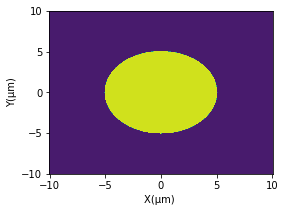

In [8]:
labels=['X(μm) ','Y(μm)']
range=[[-actual_Size/2,actual_Size/2]]*2
displace_2d(intensity(U0),labels,range)

#### Propagated wavefront via Rayleigh-Sommerfeld method

In [9]:
propagator=RaySomSolver(N_size,xyInterval,k)

At z=0.1 $\mu m$

In [10]:
Uz=propagator.cal_wavefront(U0,0.1)

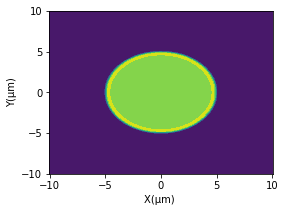

In [11]:
displace_2d(intensity(Uz),labels,range)

At z=100 $\mu m$

In [12]:
Uz=propagator.cal_wavefront(U0,100)

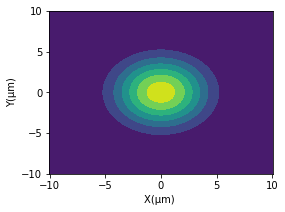

In [13]:
displace_2d(intensity(Uz),labels,range)

YZ Plane

In [14]:
z_size=100
z_range=np.linspace(0.1,100,z_size)
I_zy=np.ones((N_size,z_size),dtype=float)

In [15]:
index=0
for z in z_range:
    Uz=propagator.cal_wavefront(U0,z)
    Iz=intensity(Uz)
    #I_zy[:,index]=np.sum(Iz,axis=1)
    I_zy[:,index]=Iz[:,round(N_size/2)]
    index+=1
    if index%20==0:
        print(f'complete: {index/z_size*100:f} %')

complete: 20.000000 %
complete: 40.000000 %
complete: 60.000000 %
complete: 80.000000 %
complete: 100.000000 %


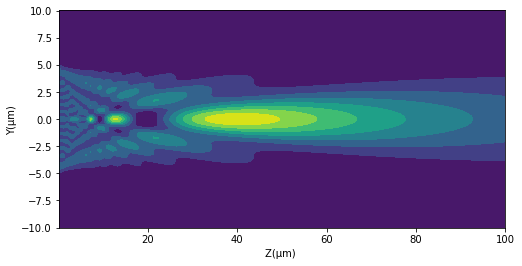

In [16]:
zyrange=[[0.1,100],[-actual_Size/2,actual_Size/2]]
labels=['Z(μm) ','Y(μm)']
displace_2d(I_zy,labels,zyrange,figureSize=(8,4))

#### Propagated wavefront via Angular Spectrum method

In [17]:
propagator=AnSpectSolver(N_size,xyInterval,k)

At z=100 $\mu m$

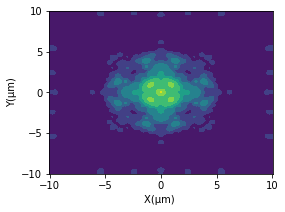

In [18]:
Uz=propagator.cal_wavefront(U0,100)
labels=['X(μm) ','Y(μm)']
displace_2d(intensity(Uz),labels,range)

YZ Plane

In [19]:
index=0
for z in z_range:
    Uz=propagator.cal_wavefront(U0,z)
    Iz=intensity(Uz)
    #I_zy[:,index]=np.sum(Iz,axis=1)
    I_zy[:,index]=Iz[:,round(N_size/2)]
    index+=1
    if index%20==0:
        print(f'complete: {index/z_size*100:f} %')

complete: 20.000000 %
complete: 40.000000 %
complete: 60.000000 %
complete: 80.000000 %
complete: 100.000000 %


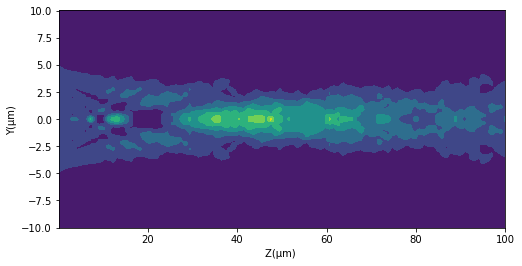

In [20]:
zyrange=[[0.1,100],[-actual_Size/2,actual_Size/2]]
labels=['Z(μm) ','Y(μm)']
displace_2d(I_zy,labels,zyrange,figureSize=(8,4))

### Problem 2


Calculate the diffraction of a phase plate modulated by $exp[-kr^2/(2f)], f=50\mu m$ with a diameter of $100\mu m$ illuminated by the parallel light from $z=30\mu m$ to $z=70\mu m$.

#### Parameters

In [8]:
N_size=1001
#μm plane [200,200]μm 
inteval=0.2 
waveLambda=0.633
k=2.0*pi/waveLambda
f=50
actual_Size=N_size*inteval
xyInterval=[inteval]*2

#### Incident Light

In [9]:
def modulator(X,Y):
    r2=np.power(X,2)+np.power(Y,2)
    return np.exp(-1j*k*r2/(2*f))

In [10]:
circPartern=PatternGenerator(N_size,xyInterval,pattern='circle',modulator=modulator)
U0=circPartern.generate([50])

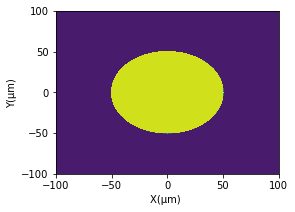

In [11]:
labels=['X(μm) ','Y(μm)']
range=[[-actual_Size/2,actual_Size/2]]*2
displace_2d(intensity(U0),labels,range)

#### Propagated wavefront via Rayleigh-Sommerfeld method

In [12]:
propagator=RaySomSolver(N_size,xyInterval,k)

At z=30 $\mu m$

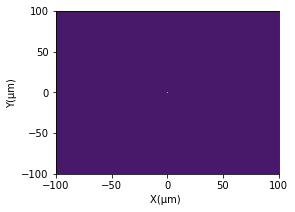

In [13]:
Uz=propagator.cal_wavefront(U0,30)
displace_2d(intensity(Uz),labels,range)

At z=70 $\mu m$

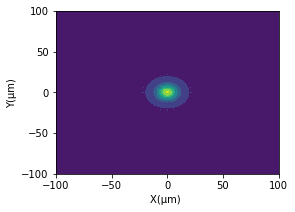

In [14]:
Uz=propagator.cal_wavefront(U0,70)
displace_2d(intensity(Uz),labels,range)

YZ Plane

In [15]:
z_size=40
z_range=np.linspace(30,70,z_size)
I_zy=np.ones((N_size,z_size),dtype=float)

In [16]:
index=0
for z in z_range:
    Uz=propagator.cal_wavefront(U0,z)
    Iz=intensity(Uz)
    #I_zy[:,index]=np.sum(Iz,axis=1)
    I_zy[:,index]=Iz[:,round(N_size/2)]
    index+=1
    if index%10==0:
        print(f'complete: {index/z_size*100:f} %')

complete: 25.000000 %
complete: 50.000000 %
complete: 75.000000 %
complete: 100.000000 %


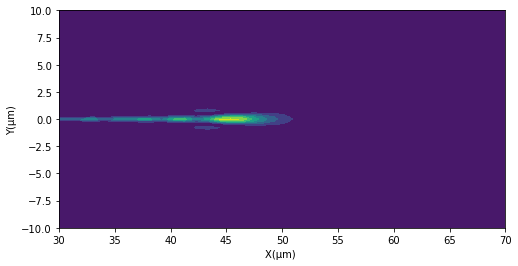

In [19]:
zyrange=[[30,70],[-actual_Size/2,actual_Size/2]]
# rescale the intensity 
displace_2d(I_zy,labels,zyrange,figureSize=(8,4),xylim=[[30,70],[-10,10]])